In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
data  = pd.read_csv('C:\\Users\\mahii\\OneDrive\\Desktop\\DataAnalysis_Afame_Technologies\\Titanic-Dataset.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data = data.convert_dtypes()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          714 non-null    Float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    Float64
 10  Cabin        204 non-null    string 
 11  Embarked     889 non-null    string 
dtypes: Float64(2), Int64(5), string(5)
memory usage: 89.8 KB


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.0,0.0,1.0,0.42,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.4542
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3292


In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Visualization

percentahe of female survived 74.20382165605095
percentage of male survived 18.890814558058924


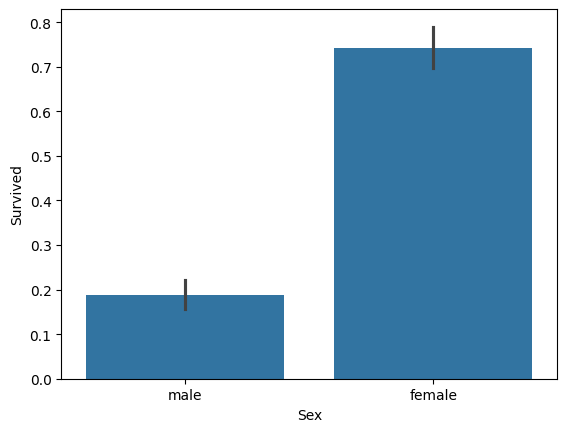

In [12]:
sns.barplot(data=data, x = 'Sex',y = 'Survived')
print('percentahe of female survived',data['Survived'][data['Sex'] == 'female'].value_counts(normalize = True)[1]*100)
print('percentage of male survived', data['Survived'][data['Sex'] == 'male'].value_counts(normalize=  True)[1]*100)



percentage of survvival in first class 62.96296296296296
percentage of survvival in second class 47.28260869565217
percentage of survvival in third class 24.236252545824847


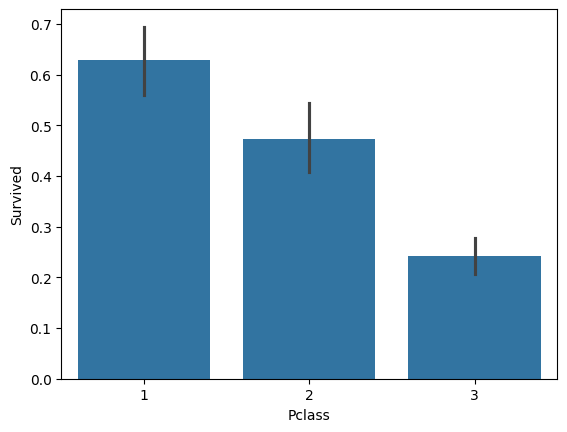

In [13]:
sns.barplot(data=data, x = 'Pclass', y = 'Survived')

print('percentage of survvival in first class', data['Survived'][data['Pclass'] == 1].value_counts(normalize=True)[1]*100)
print('percentage of survvival in second class', data['Survived'][data['Pclass'] == 2].value_counts(normalize=True)[1]*100)
print('percentage of survvival in third class', data['Survived'][data['Pclass'] == 3].value_counts(normalize=True)[1]*100)

In [14]:
""""  
The age is divided into 8 groups by usings bins
"""
data['Age'] = data['Age'].fillna(-0.5)
bins = [-1,0,5,12,18,24,35, 60, np.inf]
labels = ['unknown','Infrant','Toddler','Child','Teenager','Young Adult','Adult', 'Senior']

data['Agegroup'] = pd.cut(data['Age'],bins=bins,labels=labels)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,<NA>,S,Teenager
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,<NA>,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,<NA>,S,Young Adult


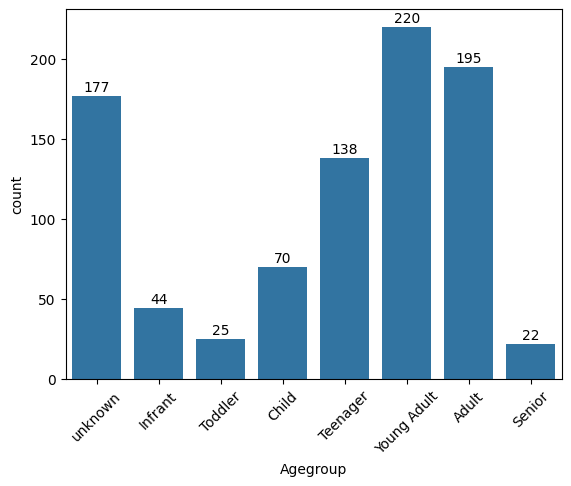

In [16]:
ax = sns.countplot(data=data, x = 'Agegroup')


for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:1.0f}'.format(height), (p.get_x() + p.get_width() / 2., height + 3), ha='center')


plt.xticks(rotation = 45)
plt.show()

Number of survived from Unknown :  52
Number of survived from Infrant :  31
Number of survived from Toddler :  9
Number of survived from Child :  30
Number of survived from Teenager :  48
Number of survived from Young Adult :  89
Number of survived from Adult :  78
Number of survived from Senior :  5


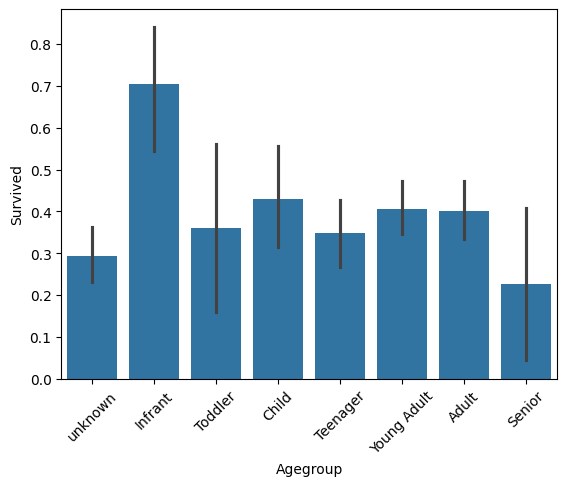

In [17]:
sns.barplot(data=data, x = 'Agegroup', y = 'Survived')

print('Number of survived from Unknown : ', data['Survived'][data['Agegroup'] == 'unknown'].value_counts()[1])
print('Number of survived from Infrant : ', data['Survived'][data['Agegroup'] == 'Infrant'].value_counts()[1])
print('Number of survived from Toddler : ', data['Survived'][data['Agegroup'] == 'Toddler'].value_counts()[1])
print('Number of survived from Child : ', data['Survived'][data['Agegroup'] == 'Child'].value_counts()[1])
print('Number of survived from Teenager : ', data['Survived'][data['Agegroup'] == 'Teenager'].value_counts()[1])
print('Number of survived from Young Adult : ', data['Survived'][data['Agegroup'] == 'Young Adult'].value_counts()[1])
print('Number of survived from Adult : ', data['Survived'][data['Agegroup'] == 'Adult'].value_counts()[1])
print('Number of survived from Senior : ', data['Survived'][data['Agegroup'] == 'Senior'].value_counts()[1])
plt.xticks(rotation = 45)
plt.show()


percentage of survvival Embarked on Cherbourg  55.35714285714286
percentage of survvival Embarked on Queenstown 38.961038961038966
percentage of survvival Embarked on third Southampton 33.69565217391305


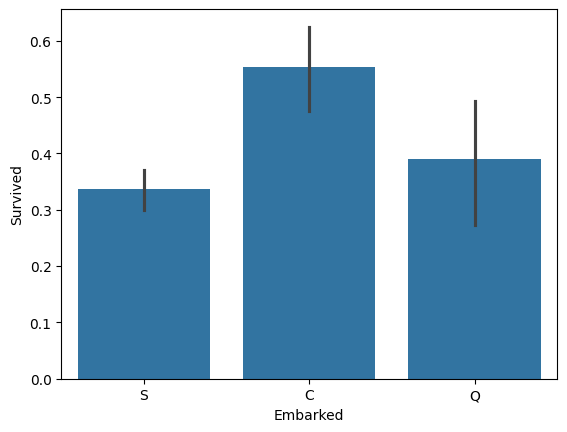

In [18]:
sns.barplot(data=data, x = 'Embarked', y = 'Survived')

print('percentage of survvival Embarked on Cherbourg ', data['Survived'][data['Embarked'] == 'C'].value_counts(normalize=True)[1]*100)
print('percentage of survvival Embarked on Queenstown', data['Survived'][data['Embarked'] == 'Q'].value_counts(normalize=True)[1]*100)
print('percentage of survvival Embarked on third Southampton', data['Survived'][data['Embarked'] == 'S'].value_counts(normalize=True)[1]*100)


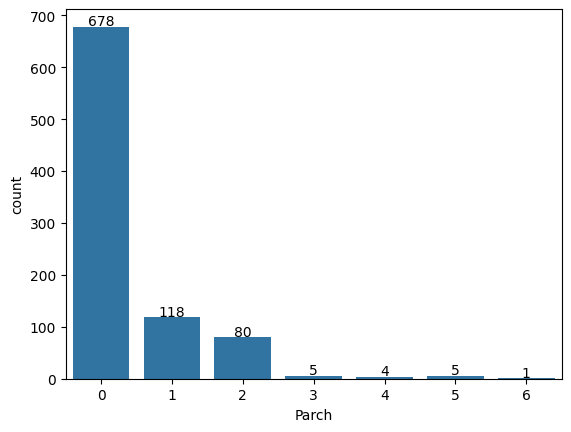

In [19]:
ax = sns.countplot(data=data,x = 'Parch')

for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:1.0f}'.format(height), (p.get_x() + p.get_width() / 2., height + 3), ha='center')

plt.show()

<Axes: xlabel='Parch', ylabel='Survived'>

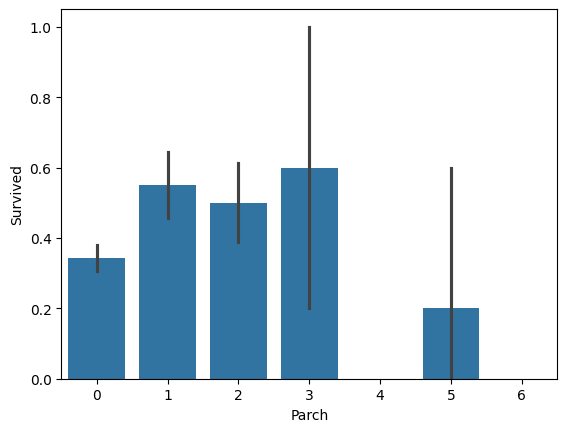

In [20]:
sns.barplot(data=data,x = 'Parch', y='Survived')

In [21]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'].unique()


<StringArray>
[      'Mr',      'Mrs',     'Miss',   'Master',      'Don',      'Rev',
       'Dr',      'Mme',       'Ms',    'Major',     'Lady',      'Sir',
     'Mlle',      'Col',     'Capt', 'Countess', 'Jonkheer']
Length: 17, dtype: string

In [22]:

data['Title'] = data['Title'].replace(['Don', 'Rev', 'Dr','Major','Col', 'Capt','Jonkheer'], 'Rare')
data['Title'] = data['Title'].replace(['Countess','Lady', 'Sir'], 'Royal')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mlle', 'Miss')

In [23]:
data[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.25
Royal,1.0


In [24]:
data = data.drop(['Cabin'],axis = 1)

In [25]:
data = data.drop(['Ticket'], axis=1)


In [26]:
data = data.drop(['Name'],axis = 1)

In [27]:
data['Embarked'] = data['Embarked'].fillna('S')

Convert categorical data into numerical data

In [28]:
le = LabelEncoder()

le.fit(data['Sex'])
data['Sex'] = le.transform(data['Sex'])
le.fit(data['Embarked'])
data['Embarked'] = le.transform(data['Embarked'])


In [29]:
agemap = {'unknown' : 0,'Infrant': 1,'Toddler':2,'Child' : 3,'Teenager' : 4,'Young Adult' : 5,'Adult' : 6, 'Senior': 7}
data['Agegroup'] = data['Agegroup'].map(agemap)

In [30]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup,Title
0,1,0,3,1,22.0,1,0,7.25,2,4,Mr
1,2,1,1,0,38.0,1,0,71.2833,0,6,Mrs
2,3,1,3,0,26.0,0,0,7.925,2,5,Miss
3,4,1,1,0,35.0,1,0,53.1,2,5,Mrs
4,5,0,3,1,35.0,0,0,8.05,2,5,Mr


In [31]:
le.fit(data['Title'])
data['Title'] = le.transform(data['Title'])


In [32]:
data[['Fare','Pclass']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.67555


In [33]:
data[['Fare','Pclass']].groupby('Pclass').max()

,Fare
Pclass,
1,512.3292
2,73.5
3,69.55


In [34]:
data[['Fare','Pclass']].groupby('Pclass').min()

,Fare
Pclass,
1,0.0
2,0.0
3,0.0


In [35]:
data['Fareband'] = pd.qcut(data['Fare'],4)
data[['Fareband','Survived']].groupby('Fareband').mean()

C:\Users\mahii\AppData\Local\Temp\ipykernel_21808\3144506331.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[['Fareband','Survived']].groupby('Fareband').mean()


,Survived
Fareband,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [36]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup,Title,Fareband
0,1,0,3,1,22.0,1,0,7.25,2,4,2,"(-0.001, 7.91]"
1,2,1,1,0,38.0,1,0,71.2833,0,6,3,"(31.0, 512.329]"
2,3,1,3,0,26.0,0,0,7.925,2,5,1,"(7.91, 14.454]"
3,4,1,1,0,35.0,1,0,53.1,2,5,3,"(31.0, 512.329]"
4,5,0,3,1,35.0,0,0,8.05,2,5,2,"(7.91, 14.454]"


In [37]:
le.fit(data['Fareband'])
data['Fare'] = le.transform(data['Fareband'])


In [38]:
data = data.drop(['Fareband'],axis = 1)

In [39]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup,Title
0,1,0,3,1,22.0,1,0,0,2,4,2
1,2,1,1,0,38.0,1,0,3,0,6,3
2,3,1,3,0,26.0,0,0,1,2,5,1
3,4,1,1,0,35.0,1,0,3,2,5,3
4,5,0,3,1,35.0,0,0,1,2,5,2


Split the data into train & test

In [40]:
x = data.drop(['PassengerId','Survived'],axis=1)
y = data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size = 0.22, random_state = 43)

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(694, 9)
(694,)
(197, 9)
(197,)


Prediction Models

In [63]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy = round(accuracy_score(y_pred,y_test)*100,2)
print(accuracy)


79.7


In [49]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)
accuracy = round(accuracy_score(y_pred,y_test)*100,2)
print(accuracy)

74.11


In [50]:
GB = GaussianNB()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
accuracy = round(accuracy_score(y_pred,y_test)*100,2)
print(accuracy)

75.13


In [51]:
svm = SVC(kernel='rbf')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
accuracy = round(accuracy_score(y_pred,y_test)*100,2)
print(accuracy)

61.42


In [52]:
DTR = DecisionTreeClassifier(criterion='gini' ,max_depth=4,min_samples_leaf=5)
DTR.fit(x_train,y_train)
y_pred = DTR.predict(x_test)

accuracy = round(accuracy_score(y_pred,y_test)*100,2)
print(accuracy)

79.7
